In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from tqdm import tqdm
import scipy
import spiceypy as spice
import rebound
import reboundx
import matplotlib
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [2]:
GRAVITATIONAL_CONSTANT = 6.67430e-11 #m^3/kg/s^2
MASS_SUN = 1.98847e30 #kg
AU_TO_M = 1.495978707e11 # m/AU
DAY_TO_SEC = 86400 # sec/day
L_SUN = 3.828e26 # W
SPEED_OF_LIGHT = 299792458 #m/s
MASS_J = 1.89813e27 #kg
MASS_E = 5.97237e24 #kg
MASS_MR = 6.4171e23 #kg
MASS_V = 4.8675e24 #kg
MASS_HG = 3.3011e23 #kg
year = spice.jyear() # Year [s]
au = AU_TO_M # Astronomical Unit [m]

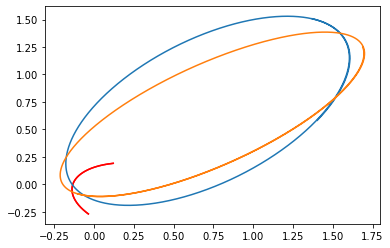

In [3]:
orbit = np.load('orbit_time.npy')
orbit_act = np.load('orbit.npy')
psp = np.load('psp-week_after.npy')
psp2 = np.load('psp-week_both.npy')
t = np.load('t-week_after.npy')
t2 = np.load('t-week_both.npy')
psp_vel = np.load('psp-vel.npy')
t_vel = np.load('t-vel.npy')

plt.plot(psp2[:,0], psp2[:,1], c = 'r')
plt.plot(psp_vel[:,0], psp_vel[:,1], c = 'r')

psp2 = psp_vel[:,:3]
t2 = t_vel

plt.plot(orbit[:,0,0], orbit[:,0,1])
plt.plot(orbit_act[:,0,0], orbit_act[:,0,1])

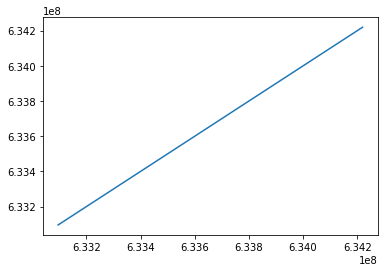

In [4]:
plt.plot(t_vel, t_vel)

In [5]:
spice.furnsh("SPICE/meta.tm")

In [6]:

t_start = spice.str2et('2017-01-01')
beg = spice.str2et('2017-01-01')
end = spice.str2et('2019-01-01')

pts_per_year = 365*24*60
n_particles = 1
n_years = 2


[y0, lt] = spice.spkezr('2003200', t_start, 'J2000', 'NONE', 'SUN')
y0 = spice.convrt(y0, "KM", "AU")


n = 1


# sim = rebound.Simulation("/content/gdrive/MyDrive/Research/Su_2021/J+Inner.bin")
sim = rebound.Simulation()


sim.units = ('s', 'AU', 'Msun')
sim.dt = -.001
sim.add(m=1.)

[yj, lt] = spice.spkezr("JUPITER BARYCENTER", t_start, "J2000", "NONE", "SUN")
yj = spice.convrt(yj, "KM", "AU")
sim.add(m=0.000954588, x=yj[0], y=yj[1], z=yj[2], vx=yj[3], vy=yj[4], vz=yj[5])
print("Added Jupiter...")

[e_pos, lt] = spice.spkezr('EARTH', t_start, 'J2000', 'NONE', 'SUN')
e_pos = spice.convrt(e_pos, 'KM', 'AU')
sim.add(m=MASS_E/MASS_SUN, x=e_pos[0], y=e_pos[1], z=e_pos[2], vx=e_pos[3], vy=e_pos[4], vz=e_pos[5])
print("Added Earth...")


[mr_pos, lt] = spice.spkezr('4', t_start, 'J2000', 'NONE', 'SUN')
mr_pos = spice.convrt(mr_pos, 'KM', 'AU')
sim.add(m=MASS_MR/MASS_SUN, x=mr_pos[0], y=mr_pos[1], z=mr_pos[2], vx=mr_pos[3], vy=mr_pos[4], vz=mr_pos[5])
print("Added Mars...")



[v_pos, lt] = spice.spkezr('VENUS', t_start, 'J2000', 'NONE', 'SUN')
v_pos = spice.convrt(v_pos, 'KM', 'AU')
sim.add(m=MASS_V/MASS_SUN, x=v_pos[0], y=v_pos[1], z=v_pos[2], vx=v_pos[3], vy=v_pos[4], vz=v_pos[5])
print("Added Venus...")



[hg_pos, lt] = spice.spkezr('MERCURY', t_start, 'J2000', 'NONE', 'SUN')
hg_pos = spice.convrt(hg_pos, 'KM', 'AU')
sim.add(m=MASS_HG/MASS_SUN, x=hg_pos[0], y=hg_pos[1], z=hg_pos[2], vx=hg_pos[3], vy=hg_pos[4], vz=hg_pos[5])
print("Added Mercury...")


n_active = len(sim.particles)




sim.n_active = n_active
sim.collision = "none"



sim.move_to_hel()
print("adding particles...")

sim.add(x = y0[0], y=y0[1], z=y0[2], vx=y0[3], vy = y0[4], vz = y0[5])
sim.move_to_com()




print("time arrays...")

Noutputs = n_years*pts_per_year
year = spice.jyear()
times = np.linspace(end-t_start, beg-t_start, int(Noutputs))


t2 = np.linspace(0, end-t_start, int(1600 + 3000)*100)
pos = np.zeros((n,int(Noutputs),3))

sim.move_to_com()        
ps = sim.particles      



xy = np.zeros((int(Noutputs),6))
xy2 = np.zeros((int(1600 + 3000)*100,3))
d = np.zeros(int(Noutputs))
print("simulating...")
p = sim.particles[6]

for i, time in enumerate(tqdm(t2)):
    sim.integrate(time)
    xy2[i] = [p.x, p.y, p.z]    
for i, time in enumerate(tqdm(times)):
    sim.integrate(time)
    sim.move_to_hel()
    xy[i] = [p.x, p.y, p.z, p.vx, p.vy, p.vz]
    d[i] = spice.vnorm(xy[i][0:3])
    sim.move_to_com()

start_date = t_start

  1%|          | 5074/460000 [00:00<00:08, 50738.60it/s]

Added Jupiter...
Added Earth...
Added Mars...
Added Venus...
Added Mercury...
adding particles...
time arrays...
simulating...


100%|██████████| 1051200/1051200 [00:49<00:00, 21033.02it/s]


In [7]:
idxmin = np.argmin(d)
t_start = times[idxmin] + start_date
perihelion = xy[idxmin]



date_start = spice.et2utc(t_start, "C", 14)
date_start

'2018 JAN 25 08:12:32.0000246763229'

100%|██████████| 730/730 [00:00<00:00, 35272.64it/s]


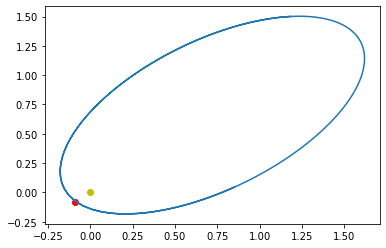

2018 JAN 25 08:12:32


In [8]:
x = np.array([0,0,0])
t = np.linspace(spice.str2et('1600-01-01'), spice.str2et('1602-01-01'), num=365*2)
for time in tqdm(t):
  [pos, lt] = spice.spkpos("2003200", time, "J2000", "NONE", "SUN")
  x = np.vstack((x, pos))

x = x[1:]
plt.plot(x[:,0]/AU_TO_M*1e3, x[:,1]/AU_TO_M*1e3)
plt.scatter(perihelion[0], perihelion[1], c='r')
plt.scatter(0, 0, c='y' )
plt.show()
print(spice.et2utc(t_start, "C", 0))

In [9]:
perihelion = spice.convrt(perihelion, "AU", "M")

p_vel = np.sqrt(np.sum(perihelion[3:] ** 2))

In [10]:
p_vel

109460.94567645801

In [48]:
points = []
n = 5


for i in tqdm(range(n)):
    data = np.load(f'Output_novel/particles{i}.npy')
    beta = np.load(f'Output_novel/beta{i}.npy')
    size = np.load(f'Output_novel/mass{i}.npy')
    
    data = data.reshape(10000*100*2, 5)
    data = data[:,:3]
    
#     data[:,2] -= offset(data[:,1])
    
    
    points.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), np.tile(beta,20000).reshape(2000000,1))))
    
points = np.array(points)
points = points.reshape(2000000*n,5)

100%|██████████| 5/5 [00:01<00:00,  3.31it/s]


In [49]:
print(f"removing at least {points[points[:,0] > 0.5].shape[0]} of {points.shape[0]} points")
points = points[points[:,0] < 0.1]
points = points[points[:,1] < 0.1]

print("removed")
particles = scipy.spatial.KDTree(points[:,:3])

removing at least 8870985 of 10000000 points
removed


In [50]:
points2 = []
n=5
for i in tqdm(range(n)):
    data = np.load(f'Output_vel/particles{i}.npy')
    beta = np.load(f'Output_vel/beta{i}.npy')
    size = np.load(f'Output_vel/mass{i}.npy')
    
    data = data.reshape(10000*100*2, 5)
    data = data[:,:3]
    
#     data[:,2] -= offset(data[:,1])
    
    
    points2.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), np.tile(beta,20000).reshape(2000000,1))))
    
points2 = np.array(points2)
points2 = points2.reshape(2000000*n,5)



100%|██████████| 5/5 [00:00<00:00,  9.69it/s]


In [51]:
points2 = points2[points2[:,0] < 0.1]
points2 = points2[points2[:,1] < 0.1]
particles2 = scipy.spatial.KDTree(points2[:,:3])

In [52]:
points3 = []
n=30
for i in tqdm(range(n)):
    data = np.load(f'Output_distr/particles{i}.npy')
    beta = np.load(f'Output_distr/beta{i}.npy')
    size = np.load(f'Output_distr/mass{i}.npy')
    
    data = data.reshape(10000*10*2, 5)
    data = data[:,:3]
    
#     data[:,2] -= offset(data[:,1])
    
    
    points3.append(np.hstack((data, np.tile(size,20000).reshape(200000,1), np.tile(beta,20000).reshape(200000,1))))
    
points3 = np.array(points3)
points3 = points3.reshape(200000*n,5)




100%|██████████| 30/30 [00:00<00:00, 80.77it/s]


In [53]:
points3 = points3[points3[:,0] < 0.1]
points3 = points3[points3[:,1] < 0.1]
particles3 = scipy.spatial.KDTree(points3[:,:3])

In [54]:
norm = 1e14/np.sum(points[:,3])
norm2 = 1e14/np.sum(points2[:,3])
norm3 = 1e14/np.sum(points3[:,3])

In [55]:
impact = pd.read_csv('psp_imp_rate_orb04.txt', sep = '\s+')
spice.furnsh("SPICE/meta.tm")
t3 = spice.str2et(impact["Time"])






In [77]:
psp_t

[633096065.1845622,
 633097469.2021128,
 633098873.2196635,
 633100277.2372141,
 633101681.2547648,
 633103085.2723154,
 633104489.2898661,
 633105893.3074167,
 633107297.3249673,
 633108701.342518,
 633110105.3600686,
 633111509.3776193,
 633112913.3951699,
 633114317.4127206,
 633115721.4302711,
 633117125.4478219,
 633118529.4653724,
 633119933.482923,
 633121337.5004737,
 633122741.5180243,
 633124145.535575,
 633125549.5531256,
 633126953.5706763,
 633128357.5882269,
 633129761.6057775,
 633131165.6233282,
 633132569.6408788,
 633133973.6584295,
 633135377.6759801,
 633136781.6935308,
 633138185.7110814,
 633139589.7286321,
 633140993.7461827,
 633142397.7637333,
 633143801.781284,
 633145205.7988346,
 633146609.8163853,
 633148013.8339359,
 633149417.8514866,
 633150821.8690372,
 633152225.8865877,
 633153629.9041384,
 633155033.921689,
 633156437.9392397,
 633157841.9567903,
 633159245.974341,
 633160649.9918916,
 633162054.0094423,
 633163458.0269929,
 633164862.0445435,
 63316

In [76]:

n_part_vel = np.zeros((int(psp2.shape[0]/100)))
r_vel = np.zeros((int(psp2.shape[0]/100)))


n_part_no_vel = np.zeros((int(psp2.shape[0]/100)))
r_no_vel = np.zeros((int(psp2.shape[0]/100)))


n_part_distr = np.zeros((int(psp2.shape[0]/100)))
r_distr = np.zeros((int(psp2.shape[0]/100)))

r = 0.05
psp_t = []


for i in tqdm(range(int(psp2.shape[0]/100))):
        psp_t.append(t_vel[i*100])
        n_part_vel[i] = len(particles2.query_ball_point(psp2[i*100], r))
        n_part_distr[i] = len(particles3.query_ball_point(psp2[i*100], r))
        n_part_no_vel[i] = len(particles.query_ball_point(psp2[i*100], r))
        V = 4/3 * np.pi * (r*au)**3

        r_vel[i] = n_part_vel[i]/V * norm2 * (5) * (np.sqrt(np.sum(psp_vel[i,3:]**2)) + p_vel)
        #                      m^-3. n/a.   m^2            m/s                         m/s                                               
        
        
        r_distr[i] = n_part_distr[i]/V * norm3 * (5) * (np.sqrt(np.sum(psp_vel[i,3:]**2)) + p_vel)
        r_no_vel[i] = n_part_no_vel[i]/V * norm * (5) * (np.sqrt(np.sum(psp_vel[i,3:]**2)) + p_vel)

100%|██████████| 800/800 [00:49<00:00, 16.12it/s]  


In [57]:
n_mass_vel = np.zeros((int(psp2.shape[0]/100)))
n_mass_no_vel = np.zeros((int(psp2.shape[0]/100)))
n_mass_distr = np.zeros((int(psp2.shape[0]/100)))



for i in tqdm(range(int(psp2.shape[0]/100))):
        n_mass_distr[i] = np.median(points3[:,3][particles3.query_ball_point(psp2[i*100], r)])
        n_mass_vel[i] = np.median(points2[:,3][particles2.query_ball_point(psp2[i*100], r)])
        n_mass_no_vel[i] = np.median(points[:,3][particles.query_ball_point(psp2[i*100], r)])

  0%|          | 0/800 [00:00<?, ?it/s]/Users/wolfcukier/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/wolfcukier/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 800/800 [00:19<00:00, 41.57it/s]  


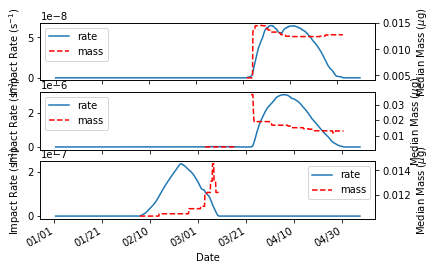

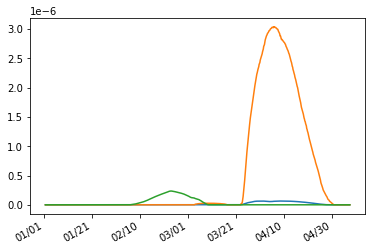

In [79]:
fig = plt.figure()
ax = fig.add_subplot(311)

x2 = np.array([t_vel[i*100] for i in range(800)])
x2 = mdates.datestr2num(spice.et2utc(psp_t, "C", 3))

l1 = ax.plot(x2, r_no_vel, label = "rate")

ax2 = ax.twinx()

l2 = ax2.plot(x2, n_mass_no_vel*1e6, '--r', label = "mass")


ax2.set_ylabel("Median Mass ($\mu$g)")
ax.set_ylabel("Impact Rate (s$^{-1}$)")
ax.set_xlabel("Date")



lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gcf().autofmt_xdate()

ax = fig.add_subplot(312)

x2 = np.array([t2[i*100] for i in range(800)])
x2 = mdates.datestr2num(spice.et2utc(x2, "C", 3))

l1 = ax.plot(x2, r_vel, label = "rate")

ax2 = ax.twinx()

l2 = ax2.plot(x2, n_mass_vel*1e6, '--r', label = "mass", )


ax2.set_ylabel("Median Mass ($\mu$g)")
ax.set_ylabel("Impact Rate (s$^{-1}$)")
ax.set_xlabel("Date")



lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gcf().autofmt_xdate()


ax = fig.add_subplot(313)

x2 = np.array([t2[i*100] for i in range(800)])
x2 = mdates.datestr2num(spice.et2utc(x2, "C", 3))

l1 = ax.plot(x2, r_distr, label = "rate")

ax2 = ax.twinx()

l2 = ax2.plot(x2, n_mass_distr*1e6, '--r', label = "mass", )


ax2.set_ylabel("Median Mass ($\mu$g)")
ax.set_ylabel("Impact Rate (s$^{-1}$)")
ax.set_xlabel("Date")



lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gcf().autofmt_xdate()
plt.show()


plt.plot(x2,r_no_vel, label = "Base Model")
plt.plot(x2,r_vel, label="Violent Creation")
plt.plot(x2,r_distr, label="Distributed Creation")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gcf().autofmt_xdate()
t2=psp_t

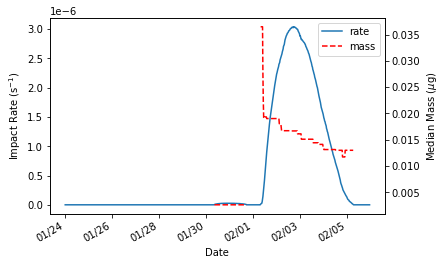

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

# x2 = np.array([t2[i*100] for i in range(800)])
x2 = mdates.datestr2num(spice.et2utc(psp_t, "C", 3))

l1 = ax.plot(x2, r_vel, label = "rate")

ax2 = ax.twinx()

l2 = ax2.plot(x2, n_mass_vel*1e6, '--r', label = "mass", )


ax2.set_ylabel("Median Mass ($\mu$g)")
ax.set_ylabel("Impact Rate (s$^{-1}$)")
ax.set_xlabel("Date")



lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gcf().autofmt_xdate()



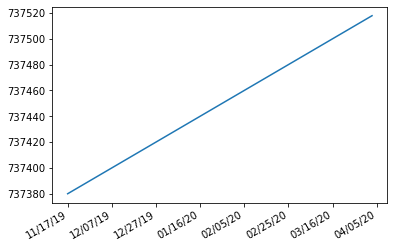

In [82]:
times = mdates.datestr2num(spice.et2utc(t3, "C", 3))
times_a = mdates.datestr2num(spice.et2utc(t_vel, "C", 3))



plt.plot(times,times)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gcf().autofmt_xdate()

Get the density of the psp data = (rate * 1 day) / (5m^2 * distance covered in that day)

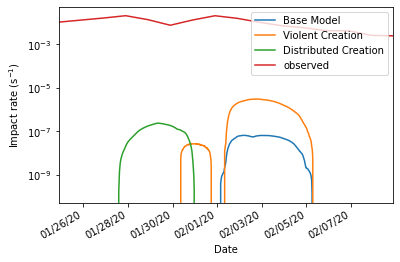

In [85]:
beg  = 45
end = 60

plt.plot(x2,r_no_vel, label = "Base Model")
plt.plot(x2,r_vel, label="Violent Creation")
plt.plot(x2,r_distr, label="Distributed Creation")

plt.plot(times, impact["Rate"][:-1], label = 'observed')

plt.xlim(times[beg], times[end])
plt.legend()
plt.yscale("log")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Impact rate (s$^{-1}$)")
plt.savefig("psp.png")
plt.show()


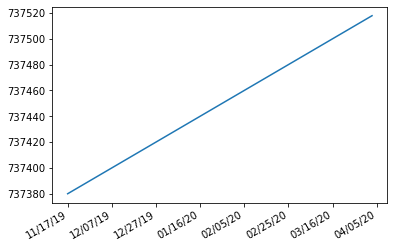

In [62]:
times = mdates.datestr2num(spice.et2utc(t3, "C", 3))
times_a = mdates.datestr2num(spice.et2utc(t_vel, "C", 3))



plt.plot(times,times)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gcf().autofmt_xdate()

In [63]:
impact["Density"] = impact["Rate"] * DAY_TO_SEC
impact.loc[-1, "Density"] = np.NaN
for i in range(impact.shape[0] - 2):
    dx = np.abs(impact.loc[i, "x"] - impact.loc[i+1, "x"])
    dy = np.abs(impact.loc[i, "y"] - impact.loc[i+1, "y"])
    dz = np.abs(impact.loc[i, "z"] - impact.loc[i+1, "z"])


    impact.loc[i, "Density"] /= (np.sqrt(dx**2 + dy**2 + dz**2)* 1000 * 5)
    


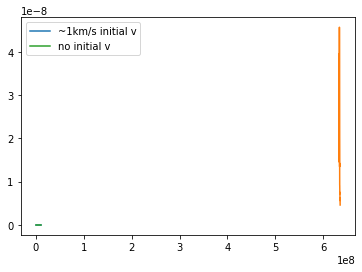

In [64]:
x = np.arange(800)/800*14 - 7

plt.rc_context({'figure.facecolor':'white'})

x2 = np.array([t2[i*100] for i in range(800)])

V = 4/3 * np.pi * r**3

plt.plot(x2, n_part_vel/V*norm/(au**3), label = '~1km/s initial v')

plt.plot(t3[41:71], impact["Density"][41:71])
plt.plot(x2, n_part_no_vel/V*norm/(au**3), label = 'no initial v')
plt.legend()



In [65]:
np.max(n_part_no_vel/V*norm/au**3)

1.182728388381819e-13

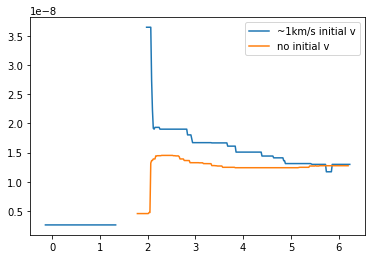

In [66]:
x = np.arange(800)/800*14 - 7

plt.rc_context({'figure.facecolor':'white'})



plt.plot(x, n_mass_vel, label = '~1km/s initial v')
plt.plot(x, n_mass_no_vel, label = 'no initial v')
plt.legend()

